In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:
data_df = pd.read_csv('data_by_year.csv')
del data_df['mode']
del data_df['key']
data_df.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333
1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845
2,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189
3,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017
4,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317


### Dataset legend
- **acousticness:** The relative metric of the track being acoustic
- **danceability:** The relative measurement of the track being danceable
- **duration_ms:** The length of the track in milliseconds (ms)
- **energy:** The energy of the track
- **instrumentalness:** The relative ratio of the track being instrumental
- **liveness:** The relative duration of the track sounding as a live performance
- **loudness:** Relative loudness of the track in the typical range [-60, 0] in decibel (dB)
- **speechiness:** The relative length of the track containing any kind of human voice
- **tempo:** Temp in bpm
- **popularity:** Popularity by people

### Легенда набора данных
- **акустика:** Относительный показатель акустики трека.
- **танцевальность:** Относительное измерение танцевальной композиции.
- **Длительность в мс:** Длина дорожки в миллисекундах (мс)
- **энергия:** энергия трека.
- **инструментальность:** Относительное соотношение инструментального трека.
- **живость:** Относительная продолжительность звучания трека как живого исполнения.
- **громкость:** Относительная громкость трека в типичном диапазоне [-60, 0] в децибелах (дБ).
- **речь:** Относительная длина трека, содержащего любой человеческий голос.
- **темп:** темп в уд / мин
- **популярность:** Популярность по людям

In [152]:
scaler = StandardScaler()

cluster_data = data_df.values
cluster_data = np.nan_to_num(cluster_data)
cluster_data = scaler.fit_transform(cluster_data)
cluster_data

array([[-1.71481604,  1.20659265, -2.26872909, ..., -2.6563715 ,
        -1.29725642,  1.26747167],
       [-1.68017329,  1.39527818, -1.05081944, ...,  0.05961761,
        -1.32213519, -1.59148698],
       [-1.64553055,  1.46336865,  0.77855795, ...,  1.62331284,
        -1.06735405, -1.59148698],
       ...,
       [ 1.64553055, -1.05367871,  2.43251253, ..., -1.46382847,
         1.74374696, -0.63850076],
       [ 1.68017329, -1.01474995,  2.07380288, ..., -1.27439124,
         1.83890975, -0.63850076],
       [ 1.71481604, -1.22778841,  2.99695873, ..., -0.54020372,
         1.79257003, -0.63850076]])

In [139]:
cluster_range = range(2, 10)
models = [KMeans(n_clusters=k, n_init=15).fit(cluster_data) for k in cluster_range]
dists = [model.inertia_ for model in models]


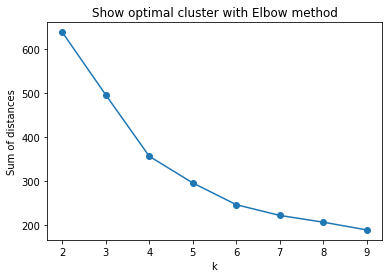

In [140]:
plt.plot(cluster_range, dists, marker="o")
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title("Show optimal cluster with Elbow method")
plt.show()


In [148]:
best_model = 2
cluster_labels = models[best_model].labels_
data_df['cluster'] = cluster_labels
data_df.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster
0,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,3
1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,0
2,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,0
4,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,0


In [149]:
data_df.groupby('cluster').mean()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
cluster,,,,,,,,,,,,
0,1931.555556,0.854212,0.558828,191249.468617,0.274349,0.315909,0.225822,-14.972876,0.211288,111.902595,0.578833,2.227365
1,2009.000000,0.266198,0.590185,232773.244510,0.638163,0.084182,0.192584,-7.565243,0.095336,121.004207,0.498188,53.535000
2,1981.000000,0.366893,0.536301,246145.251916,0.552272,0.118151,0.206760,-11.162770,0.064053,119.719269,0.566176,37.143706
3,1950.076923,0.847149,0.474892,223484.878899,0.285751,0.301409,0.211733,-14.808525,0.095248,109.749542,0.486573,9.248716


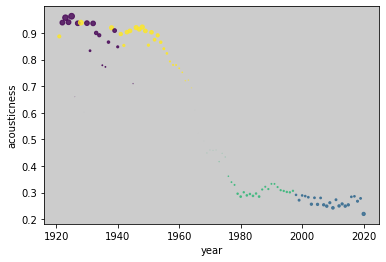

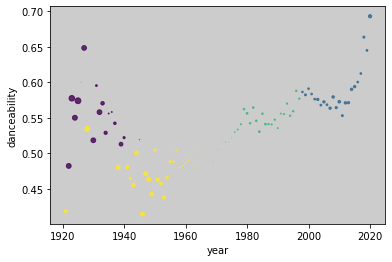

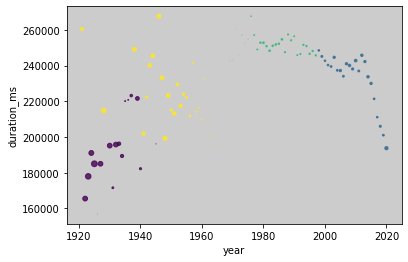

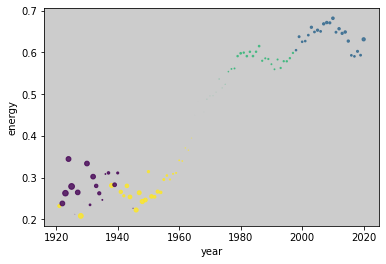

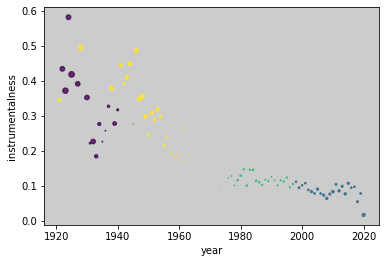

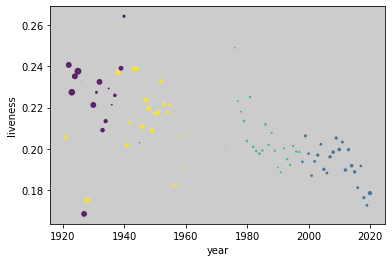

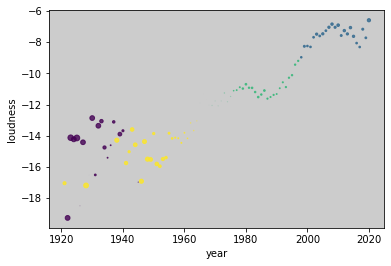

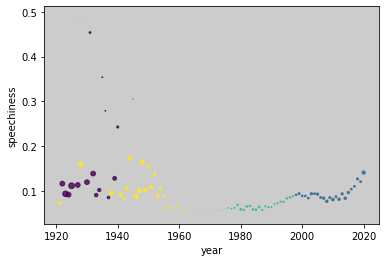

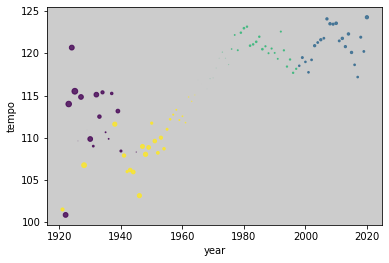

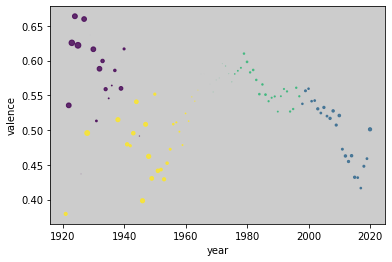

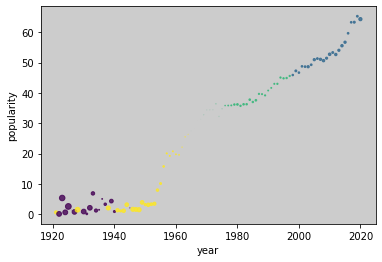

In [163]:
real_data = scaler.inverse_transform(cluster_data)
area = np.pi * (cluster_data[:, 1]) ** 6
labels = models[best_model].labels_.astype(np.float)

for i in range(1, len(cluster_data[0]) - 1):
    fig, ax = plt.subplots() 
    ax.set_facecolor('#ccc')

    plt.scatter(real_data[:, 0], real_data[:, i], s=area, c=labels, alpha=0.8)
    plt.xlabel('year')
    plt.ylabel(data_df.columns[i])

    plt.show()

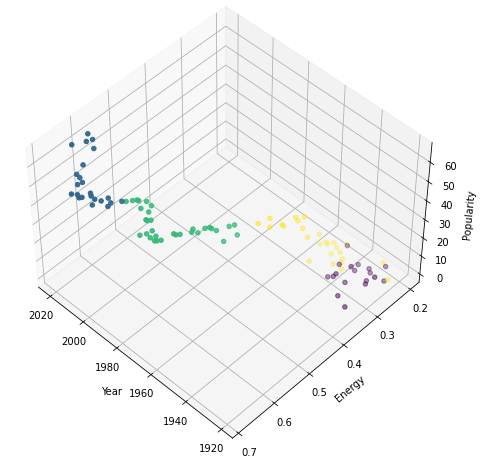

In [160]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Year')
ax.set_ylabel('Energy')
ax.set_zlabel('Popularity')

ax.scatter(real_data[:, 0], real_data[:, 4], real_data[:, 11], c=labels)